In [24]:
# Loading and parsing data

# PLOT - parse data + std-dev
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats

sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

data_path = "." #os.path.join(os.path.pardir, os.path.pardir, 'data', 'invocation_latency_small')


dfs = []
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 3145728, 4194304, 5242880 ]:
    data = pd.read_csv(os.path.join(data_path, 'data', 'lambda', f'result_aws_{size}.csv'), names=['time'])
    #data.set_index('id', drop=True, inplace=True)
    data['size'] = size
    #data['time'] /= 1000.0 * 1000.0
    dfs.append(data)
lamda = pd.concat(dfs, axis=0)
lamda['type'] = 'lambda'
print(lamda)
# read AWS data

dfs = []
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 3145728, 4194304, 5242880 ]:
    data = pd.read_csv(os.path.join(data_path, 'data', 's3', f'result_aws_{size}.csv'), names=['time'])
    #data.set_index('id', drop=True, inplace=True)
    data['size'] = size
    #data['time'] /= 1000.0 * 1000.0
    dfs.append(data)
s3 = pd.concat(dfs, axis=0)
s3['type'] = 's3'
print(s3)


dfs = []
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 3145728, 4194304, 5242880 ]:
    data = pd.read_csv(os.path.join(data_path, 'data', 'praas', f'consecutive_{size}'))
    data.set_index('id', drop=True, inplace=True)
    data['size'] = size
    data['time'] /= 1000.0 * 1000.0
    dfs.append(data)
praas = pd.concat(dfs, axis=0)
praas['type'] = 'praas'
print(praas)

data = pd.concat([lamda, s3, praas])



         time     size    type
0     17.3586        1  lambda
1     17.5504        1  lambda
2     20.2714        1  lambda
3     16.7769        1  lambda
4     19.5614        1  lambda
..        ...      ...     ...
195  411.5290  5242880  lambda
196  513.9150  5242880  lambda
197  507.4680  5242880  lambda
198  476.2750  5242880  lambda
199  465.9520  5242880  lambda

[5000 rows x 3 columns]
         time     size type
0     732.809        1   s3
1     101.231        1   s3
2     104.930        1   s3
3     102.992        1   s3
4     126.741        1   s3
..        ...      ...  ...
195  1327.380  5242880   s3
196  1507.260  5242880   s3
197  1574.490  5242880   s3
198  1458.120  5242880   s3
199  1800.860  5242880   s3

[5360 rows x 3 columns]
           time     size   type
id                             
0      4.096265        1  praas
1      4.521137        1  praas
2      4.508669        1  praas
3     45.371606        1  praas
4     46.313755        1  praas
..          ...   

<ipython-input-54-43e2e8ae2b55>:29: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log", basex=2)


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


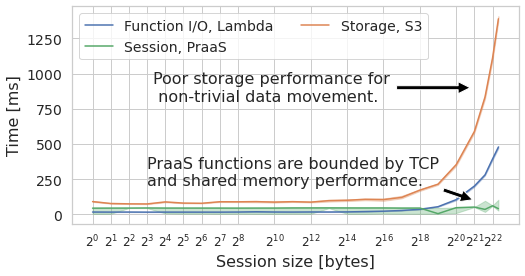

In [54]:
# PLOT - non-parametric CI


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
import math

sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)


ax = plt.gca()
legend_ethernet = []

plt = sns.lineplot(x="size", y="time", hue='type', ci=None, estimator=p50_estimator, data=data, ax=ax)

ax.set_xscale("log", basex=2)
#ax.set_yscale("log")
ax.set_xticks([1, 2,4, 8, 16, 32, 64, 128, 256, 1024, 4096, 16384, 65536,  131072*2,  1048576, 2097152,  4194304])
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
#ax.set_yticks([4,5,6,10,20])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_xlabel('Session size [bytes]',fontsize=16)
ax.set_ylabel('Time [ms]',fontsize=16)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)

handles, labels = ax.get_legend_handles_labels()

# explain in caption what doted lines are
labels = ["Function I/O, Lambda", "Storage, S3", "Session, PraaS"]

labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
#ax.legend(handles, labels, ncol=4, bbox_to_anchor=(0.52, -0.44), loc='lower center', fontsize=12)
ax.legend(handles, labels, ncol=2, loc='upper left', fontsize=14)

sizes = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 3145728, 4194304, 5242880 ])
low = np.zeros(sizes.shape)
high = np.zeros(sizes.shape)

col_palette = sns.color_palette()
print(col_palette)
#full_data = pd.concat([data, ethernet_data], axis=0)
    
for idx, data_type in enumerate(['lambda', 's3','praas']):

    i = 0
    data2 = data.loc[(data['type'] == data_type)]
    for row, group in data2.groupby(['size']):
        d = np.sort(group['time'])
        n = len(d)
        low_pos = int(math.floor( (n - 1.96*math.sqrt(n)) / 2))
        high_pos = int(math.ceil(1 +  (n + 1.96*math.sqrt(n)) / 2))
        #print(f'{data_type}, {row}, Non-param 95, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
        low_pos = int(math.floor( (n - 2.456*math.sqrt(n)) / 2))
        high_pos = int(math.ceil(1 +  (n + 2.456*math.sqrt(n)) / 2))
        #print(f'{data_type}, {row}, Non-param 99, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
        low[i] = d[low_pos]
        high[i] = d[high_pos]
        i += 1

    indices = {
        0:0,
        1:1,
        2:2,
        3:3,
        4:4
    }
    #low -= 0.5
    #high += 0.5
    plt.fill_between(sizes, low, high, alpha=.3, color=col_palette[indices[idx]])


ax.annotate('Poor storage performance for\n non-trivial data movement.', xy=(2**21, 900), xytext=(2*5, 900),fontsize=16,#fontweight='bold',
            ha="left", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate('PraaS functions are bounded by TCP\nand shared memory performance.', xy=(2**21, 100), xytext=(2*4, 300),fontsize=16,#fontweight='bold',
            ha="left", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

    
plt.figure.savefig("consecutive invocations.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

NameError: name 'ethernet_data' is not defined

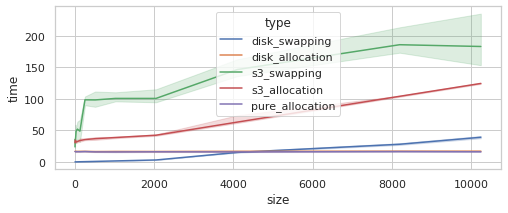

In [56]:
# PLOT - non-parametric CI, but smaller.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
import math

sns.set(rc={'figure.figsize':(8,3)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)


ax = plt.gca()
legend_ethernet = []

plt = sns.lineplot(x="size", y="time", hue='type', ci=99, estimator=p50_estimator, data=data, ax=ax)
sns.lineplot(x="size", y="Mean Latency Microseconds",data=ethernet_data, color='red', ax=ax)
legend_ethernet.append(ax.lines[-1])

sns.lineplot(x="size", y="time", hue='type', ci=None, estimator=p99_estimator, data=data, ax=ax)
# I don't know why but matplotlib has 4 lines here: 2 are plotted, 2 are used as legend labels
ax.lines[-4].set_linestyle("dotted")
ax.lines[-5].set_linestyle("dotted")
ax.lines[-6].set_linestyle("dotted")

sns.lineplot(x="size", y="99th Percentile Latency Microseconds", data=ethernet_data, color='red', ax=ax)
ax.lines[-1].set_linestyle("dotted")
legend_ethernet.append(ax.lines[-1])

ax.set_xscale("log", basex=2)
ax.set_yscale("log")
ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_yticks([4,5,6,10,20])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_xlabel('Message size [bytes]',fontsize=16)
ax.set_ylabel('RTT time [usec]',fontsize=16)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)

handles, labels = ax.get_legend_handles_labels()
# I don't know why but matplotlib doesn't import the style for some lines
handles[3].set_linestyle("--")
handles[4].set_linestyle("--")
handles[5].set_linestyle("--")

handles = handles + legend_ethernet
# explain in caption what doted lines are
labels = ["RDMA, Median", "rFaaS Hot, Median", "rFaaS Warm, Median", "_RDMA, P99", "_rFaaS Hot, P99", "_rFaaS Warm, P99", "TCP/IP, Mean","_TCP/IP, P99"]
labels = ["RDMA", "rFaaS Hot", "rFaaS Warm", "_RDMA, P99", "_rFaaS Hot, P99", "_rFaaS Warm, P99", "TCP/IP","_TCP/IP, P99"]

labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, ncol=4, bbox_to_anchor=(0.52, -0.44), loc='lower center', fontsize=12)


sizes = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
low = np.zeros(sizes.shape)
high = np.zeros(sizes.shape)

col_palette = sns.color_palette()
#full_data = pd.concat([data, ethernet_data], axis=0)
for idx, data_type in enumerate(['perftest', 'serverless_hot', 'serverless_warm']):

    i = 0
    data2 = data.loc[(data['type'] == data_type)]
    for row, group in data2.groupby(['size']):
        d = np.sort(group['time'])
        n = len(d)
        low_pos = int(math.floor( (n - 1.96*math.sqrt(n)) / 2))
        high_pos = int(math.ceil(1 +  (n + 1.96*math.sqrt(n)) / 2))
        print(f'{data_type}, {row}, Non-param 95, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
        low_pos = int(math.floor( (n - 2.456*math.sqrt(n)) / 2))
        high_pos = int(math.ceil(1 +  (n + 2.456*math.sqrt(n)) / 2))
        print(f'{data_type}, {row}, Non-param 99, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
        low[i] = d[low_pos]
        high[i] = d[high_pos]
        i += 1

    indices = {
        0:0,
        1:3,
        2:2
    }
    #low -= 0.5
    #high += 0.5
    plt.fill_between(sizes, low, high, alpha=.3, color=col_palette[indices[idx]])


ax.annotate('Inlining effects', xy=(150, 4.5), xytext=(400, 4),fontsize=16,#fontweight='bold',
            ha="left", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate('rFaaS hot latency: 3.96 usec', xy=(1, 4), xytext=(1, 6),fontsize=16,#fontweight='bold',
            ha="left", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate('rFaaS warm latency: 8.2 usec', xy=(1, 8), xytext=(1, 11.5),fontsize=16,#fontweight='bold',
            ha="left", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.figure.savefig("plot_nonparametric_ci_smaller.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)